<a href="https://colab.research.google.com/github/jieuhyl/Deep_Learning/blob/master/CNN_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [53]:
# additional imports
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [13]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [14]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (60000, 28, 28)
y_train.shape (60000,)


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


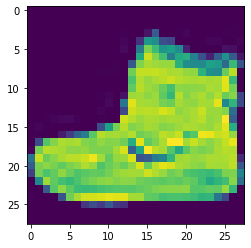

In [17]:
# shoe
#scaled_single = x_train[0]
#scaled_single.max()
plt.imshow(x_train[0])

In [18]:
# convolution expects height x width x color
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (60000, 28, 28, 1)
y_train.shape (60000,)


In [19]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [20]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [25]:
x_train[0].shape

(28, 28, 1)

In [69]:
# build model
model = Sequential(name = 'CNN_fashionmnist')
model.add(Conv2D(32, kernel_size=(3,3), padding ="same", input_shape=(28,28,1)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Conv2D(32, kernel_size=(3,3), padding ="same"))
model.add(LeakyReLU(alpha = 0.01))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3,3), padding ="same"))
model.add(LeakyReLU(alpha = 0.01))
model.add(Conv2D(64, kernel_size=(3,3), padding ="same"))
model.add(LeakyReLU(alpha = 0.01))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [70]:
model.summary()

Model: "CNN_fashionmnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)   

In [71]:
# run model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train_cat, 
          validation_data=(x_test, y_test_cat), 
          batch_size = 128, epochs = 20)

Epoch 1/20
469/469 [==============================] - 11s 23ms/step - loss: 0.6053 - accuracy: 0.7786 - val_loss: 0.3592 - val_accuracy: 0.8674
Epoch 2/20
469/469 [==============================] - 11s 22ms/step - loss: 0.3778 - accuracy: 0.8641 - val_loss: 0.2951 - val_accuracy: 0.8892
Epoch 3/20
469/469 [==============================] - 11s 22ms/step - loss: 0.3213 - accuracy: 0.8837 - val_loss: 0.2737 - val_accuracy: 0.8979
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 0.2874 - accuracy: 0.8955 - val_loss: 0.2483 - val_accuracy: 0.9122
Epoch 5/20
469/469 [==============================] - 11s 22ms/step - loss: 0.2688 - accuracy: 0.9028 - val_loss: 0.2375 - val_accuracy: 0.9140
Epoch 6/20
469/469 [==============================] - 10s 22ms/step - loss: 0.2542 - accuracy: 0.9085 - val_loss: 0.2329 - val_accuracy: 0.9148
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.2427 - accuracy: 0.9124 - val_loss: 0.2263 - val_accuracy:

In [72]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

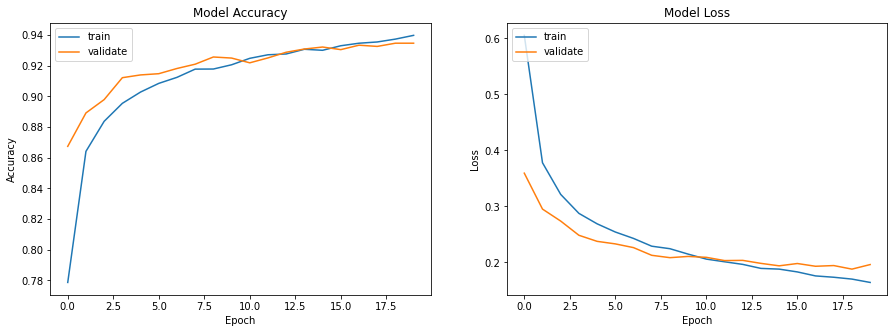

In [73]:
plotmodelhistory(model.history)

In [74]:
y_pred = np.argmax(model.predict(x_test),axis =1)
error = 0
confusion_matrix = np.zeros([10,10])
for i in range(x_test.shape[0]):
    confusion_matrix[y_test[i],y_pred[i]] += 1
    if y_test[i]!=y_pred[i]:
        error +=1
        
confusion_matrix,error,(error*100)/y_pred.shape[0],100-(error*100)/y_pred.shape[0],y_pred.shape[0]

print("Confusion Matrix: \n\n" ,confusion_matrix)
print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/y_pred.shape[0])
print("\nAccuracy : " ,100-(error*100)/y_pred.shape[0])
print("\nValidation set Shape :",y_pred.shape[0])

Confusion Matrix: 

 [[872.   0.  13.  11.   1.   0. 100.   0.   3.   0.]
 [  0. 991.   0.   5.   1.   0.   2.   0.   1.   0.]
 [ 16.   1. 869.   8.  47.   0.  59.   0.   0.   0.]
 [  7.   3.   7. 933.  28.   0.  21.   0.   1.   0.]
 [  0.   0.  12.  12. 930.   0.  46.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 990.   0.   6.   0.   4.]
 [ 76.   0.  28.  22.  43.   0. 828.   0.   3.   0.]
 [  0.   0.   0.   0.   0.   5.   0. 984.   0.  11.]
 [  1.   0.   0.   4.   2.   1.   1.   1. 990.   0.]
 [  0.   0.   0.   0.   0.   4.   1.  35.   0. 960.]]

Errors in validation set:  653

Error Persentage :  6.53

Accuracy :  93.47

Validation set Shape : 10000


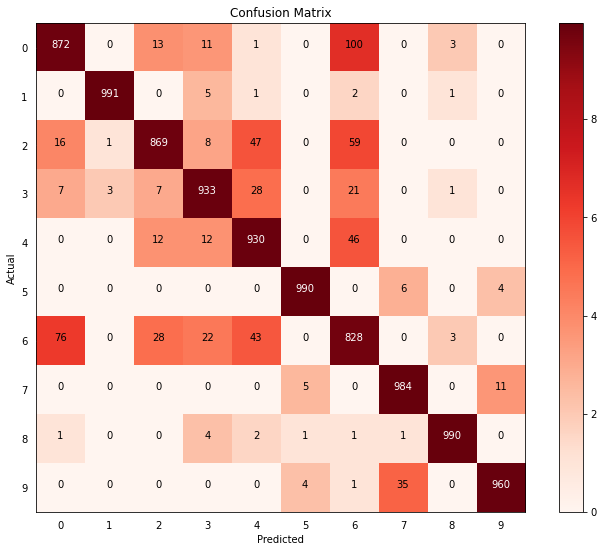

In [75]:
f = plt.figure(figsize=(12, 9))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1),cmap="Reds")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = confusion_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix2.png")
plt.show()

In [76]:
predicted_classes = model.predict_classes(x_test)
#predicted_classes = (model.predict(x_test) > 0.5).astype("int32")

p = predicted_classes[:10000]
y = y_test[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [77]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9347
Incorrect predicted classes: 653


In [78]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [79]:
def plot_images(data_index, cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, idx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(x_test[idx].reshape(28, 28), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{},  Pred:{}".format(labels[y_test[idx]], labels[predicted_classes[idx]]))
    plt.show()

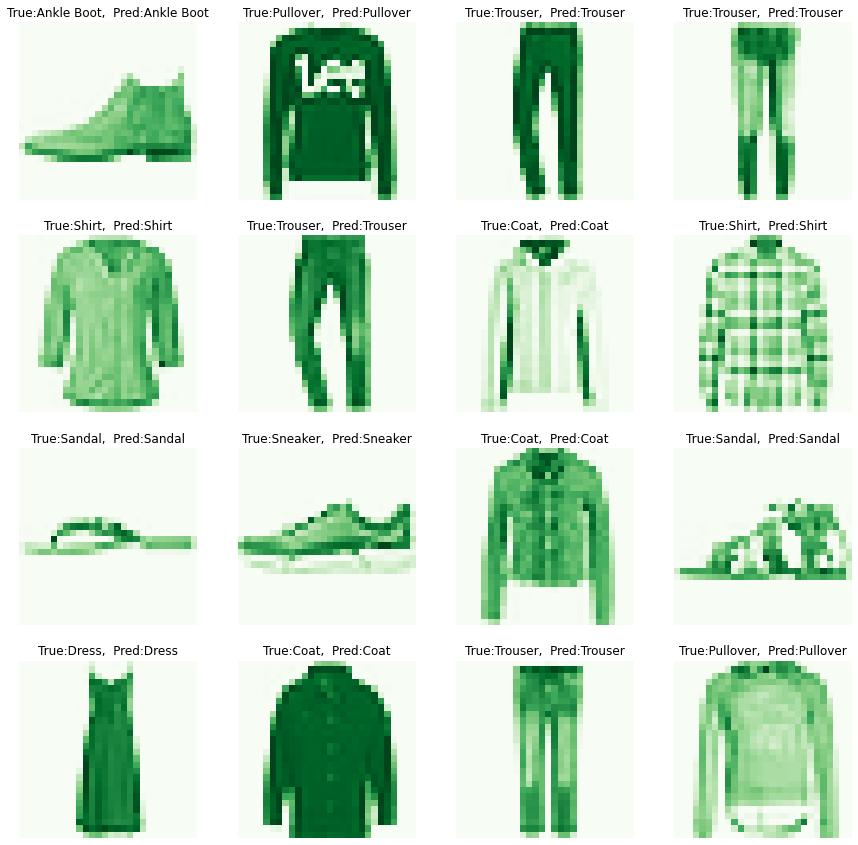

In [80]:
plot_images(correct, "Greens")

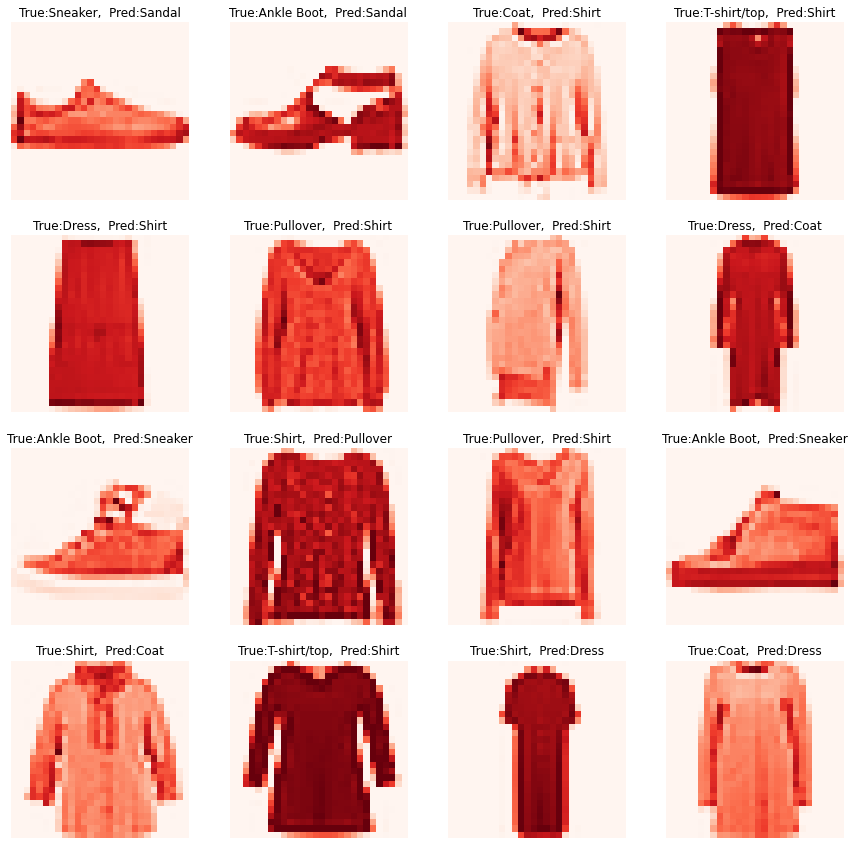

In [81]:
plot_images(incorrect, "Reds")